In [64]:
import pandas as pd
import numpy as np
import datetime
import re
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
from datetime import date, timedelta
import datetime as dt
import time
import plotly.express as px
import scipy


In [ ]:
import statsmodels.api as sm

# Extraction

In [65]:
trafic = pd.read_csv('comptages-routiers-permanents.csv', sep = ';')

In [66]:
trafic.head()

Identifiant arc            Libelle  Date et heure de comptage  \
0             4264  AV_Champs_Elysees  2022-01-01T11:00:00+01:00   
1             4264  AV_Champs_Elysees  2022-01-01T07:00:00+01:00   
2             4264  AV_Champs_Elysees  2022-01-01T19:00:00+01:00   
3             4264  AV_Champs_Elysees  2022-01-01T18:00:00+01:00   
4             4264  AV_Champs_Elysees  2022-01-01T09:00:00+01:00   

   Débit horaire  Taux d'occupation Etat trafic  Identifiant noeud amont  \
0          524.0            8.85667      Fluide                     2294   
1          491.0            7.71611      Fluide                     2294   
2          997.0           46.28889      Saturé                     2294   
3         1096.0           46.60222      Saturé                     2294   
4          258.0            3.75445      Fluide                     2294   

            Libelle noeud amont  Identifiant noeud aval  \
0  Av_Champs_Elysees-Washington                    2293   
1  Av_Champs_Elysees-Washington                    2293   
2  Av_Champs_Elysees-Washington                    2293   
3  Av_Champs_Elysees-Washington                    2293   
4  Av_Champs_Elysees-Washington                    2293   

        Libelle noeud aval  Etat arc Date debut dispo data  \
0  Av_Champs_Elysees-Berri  Invalide            2005-01-01   
1  Av_Champs_Elysees-Berri  Invalide            2005-01-01   
2  Av_Champs_Elysees-Berri  Invalide            2005-01-01   
3  Av_Champs_Elysees-Berri  Invalide            2005-01-01   
4  Av_Champs_Elysees-Berri  Invalide            2005-01-01   

  Date fin dispo data                          geo_point_2d  \
0          2019-06-01  48.871535879911605,2.301722792456062   
1          2019-06-01  48.871535879911605,2.301722792456062   
2          2019-06-01  48.871535879911605,2.301722792456062   
3          2019-06-01  48.871535879911605,2.301722792456062   
4          2019-06-01  48.871535879911605,2.301722792456062   

                                           geo_shape  
0  {"coordinates": [[2.3009951475, 48.8717770435]...  
1  {"coordinates": [[2.3009951475, 48.8717770435]...  
2  {"coordinates": [[2.3009951475, 48.8717770435]...  
3  {"coordinates": [[2.3009951475, 48.8717770435]...  
4  {"coordinates": [[2.3009951475, 48.8717770435]...

# Cleaning

In [67]:
trafic.columns = trafic.columns.str.replace(' ','_')
trafic.columns = trafic.columns.str.replace('é','e')
trafic.columns = trafic.columns.str.replace("'",'')
trafic.columns = trafic.columns.str.lower()

In [68]:
trafic

identifiant_arc            libelle  date_et_heure_de_comptage  \
0                4264  AV_Champs_Elysees  2022-01-01T11:00:00+01:00   
1                4264  AV_Champs_Elysees  2022-01-01T07:00:00+01:00   
2                4264  AV_Champs_Elysees  2022-01-01T19:00:00+01:00   
3                4264  AV_Champs_Elysees  2022-01-01T18:00:00+01:00   
4                4264  AV_Champs_Elysees  2022-01-01T09:00:00+01:00   
...               ...                ...                        ...   
7650             4264  AV_Champs_Elysees  2022-09-01T03:00:00+02:00   
7651             4264  AV_Champs_Elysees  2022-08-01T04:00:00+02:00   
7652             4264  AV_Champs_Elysees  2022-08-01T03:00:00+02:00   
7653             4264  AV_Champs_Elysees  2022-08-01T02:00:00+02:00   
7654             4264  AV_Champs_Elysees  2022-08-01T01:00:00+02:00   

      debit_horaire  taux_doccupation etat_trafic  identifiant_noeud_amont  \
0             524.0           8.85667      Fluide                     2294   
1             491.0           7.71611      Fluide                     2294   
2             997.0          46.28889      Saturé                     2294   
3            1096.0          46.60222      Saturé                     2294   
4             258.0           3.75445      Fluide                     2294   
...             ...               ...         ...                      ...   
7650          396.0           4.35834      Fluide                     2294   
7651          274.0           3.19278      Fluide                     2294   
7652          431.0           5.57778      Fluide                     2294   
7653          526.0           7.41333      Fluide                     2294   
7654          796.0          14.38444      Fluide                     2294   

               libelle_noeud_amont  identifiant_noeud_aval  \
0     Av_Champs_Elysees-Washington                    2293   
1     Av_Champs_Elysees-Washington                    2293   
2     Av_Champs_Elysees-Washington                    2293   
3     Av_Champs_Elysees-Washington                    2293   
4     Av_Champs_Elysees-Washington                    2293   
...                            ...                     ...   
7650  Av_Champs_Elysees-Washington                    2293   
7651  Av_Champs_Elysees-Washington                    2293   
7652  Av_Champs_Elysees-Washington                    2293   
7653  Av_Champs_Elysees-Washington                    2293   
7654  Av_Champs_Elysees-Washington                    2293   

           libelle_noeud_aval  etat_arc date_debut_dispo_data  \
0     Av_Champs_Elysees-Berri  Invalide            2005-01-01   
1     Av_Champs_Elysees-Berri  Invalide            2005-01-01   
2     Av_Champs_Elysees-Berri  Invalide            2005-01-01   
3     Av_Champs_Elysees-Berri  Invalide            2005-01-01   
4     Av_Champs_Elysees-Berri  Invalide            2005-01-01   
...                       ...       ...                   ...   
7650  Av_Champs_Elysees-Berri  Invalide            2005-01-01   
7651  Av_Champs_Elysees-Berri  Invalide            2005-01-01   
7652  Av_Champs_Elysees-Berri  Invalide            2005-01-01   
7653  Av_Champs_Elysees-Berri  Invalide            2005-01-01   
7654  Av_Champs_Elysees-Berri  Invalide            2005-01-01   

     date_fin_dispo_data                          geo_point_2d  \
0             2019-06-01  48.871535879911605,2.301722792456062   
1             2019-06-01  48.871535879911605,2.301722792456062   
2             2019-06-01  48.871535879911605,2.301722792456062   
3             2019-06-01  48.871535879911605,2.301722792456062   
4             2019-06-01  48.871535879911605,2.301722792456062   
...                  ...                                   ...   
7650          2019-06-01  48.871535879911605,2.301722792456062   
7651          2019-06-01  48.871535879911605,2.301722792456062   
7652          2019-06-01  48.871535879911605,2.301722792456062   
7653          2019-06-01  48.8

## Date and time

In [69]:
trafic['datetime'] = pd.to_datetime(trafic['date_et_heure_de_comptage'])

In [70]:
# trafic['datetime']

In [71]:
trafic['date'] = [d.date() for d in trafic['datetime']]
trafic['time'] = [d.time() for d in trafic['datetime']]

In [72]:
trafic['date'] = pd.to_datetime(trafic['date'])

In [73]:
trafic['day_of_week'] = trafic['date'].dt.day_name()

In [74]:
trafic.head()

identifiant_arc            libelle  date_et_heure_de_comptage  \
0             4264  AV_Champs_Elysees  2022-01-01T11:00:00+01:00   
1             4264  AV_Champs_Elysees  2022-01-01T07:00:00+01:00   
2             4264  AV_Champs_Elysees  2022-01-01T19:00:00+01:00   
3             4264  AV_Champs_Elysees  2022-01-01T18:00:00+01:00   
4             4264  AV_Champs_Elysees  2022-01-01T09:00:00+01:00   

   debit_horaire  taux_doccupation etat_trafic  identifiant_noeud_amont  \
0          524.0           8.85667      Fluide                     2294   
1          491.0           7.71611      Fluide                     2294   
2          997.0          46.28889      Saturé                     2294   
3         1096.0          46.60222      Saturé                     2294   
4          258.0           3.75445      Fluide                     2294   

            libelle_noeud_amont  identifiant_noeud_aval  \
0  Av_Champs_Elysees-Washington                    2293   
1  Av_Champs_Elysees-Washington                    2293   
2  Av_Champs_Elysees-Washington                    2293   
3  Av_Champs_Elysees-Washington                    2293   
4  Av_Champs_Elysees-Washington                    2293   

        libelle_noeud_aval  etat_arc date_debut_dispo_data  \
0  Av_Champs_Elysees-Berri  Invalide            2005-01-01   
1  Av_Champs_Elysees-Berri  Invalide            2005-01-01   
2  Av_Champs_Elysees-Berri  Invalide            2005-01-01   
3  Av_Champs_Elysees-Berri  Invalide            2005-01-01   
4  Av_Champs_Elysees-Berri  Invalide            2005-01-01   

  date_fin_dispo_data                          geo_point_2d  \
0          2019-06-01  48.871535879911605,2.301722792456062   
1          2019-06-01  48.871535879911605,2.301722792456062   
2          2019-06-01  48.871535879911605,2.301722792456062   
3          2019-06-01  48.871535879911605,2.301722792456062   
4          2019-06-01  48.871535879911605,2.301722792456062   

                                           geo_shape  \
0  {"coordinates": [[2.3009951475, 48.8717770435]...   
1  {"coordinates": [[2.3009951475, 48.8717770435]...   
2  {"coordinates": [[2.3009951475, 48.8717770435]...   
3  {"coordinates": [[2.3009951475, 48.8717770435]...   
4  {"coordinates": [[2.3009951475, 48.8717770435]...   

                    datetime       date      time day_of_week  
0  2022-01-01 11:00:00+01:00 2022-01-01  11:00:00    Saturday  
1  2022-01-01 07:00:00+01:00 2022-01-01  07:00:00    Saturday  
2  2022-01-01 19:00:00+01:00 2022-01-01  19:00:00    Saturday  
3  2022-01-01 18:00:00+01:00 2022-01-01  18:00:00    Saturday  
4  2022-01-01 09:00:00+01:00 2022-01-01  09:00:00    Saturday

# Analysis

In [75]:
trafic['etat_trafic'].unique()

array(['Fluide', 'Saturé', 'Bloqué', 'Inconnu', 'Pré-saturé'],
      dtype=object)

In [76]:
trafic.etat_arc.unique()

array(['Invalide', 'Barré'], dtype=object)

occupation_by_time = trafic.groupby(['time'], as_index = False).agg({
    '''Taux d'occupation''' : 'mean'
})

In [77]:
trafic.corr()

<ipython-input-77-bfec1b66b633>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



identifiant_arc  debit_horaire  taux_doccupation  \
identifiant_arc                      NaN            NaN               NaN   
debit_horaire                        NaN       1.000000          0.627495   
taux_doccupation                     NaN       0.627495          1.000000   
identifiant_noeud_amont              NaN            NaN               NaN   
identifiant_noeud_aval               NaN            NaN               NaN   

                         identifiant_noeud_amont  identifiant_noeud_aval  
identifiant_arc                              NaN                     NaN  
debit_horaire                                NaN                     NaN  
taux_doccupation                             NaN                     NaN  
identifiant_noeud_amont                      NaN                     NaN  
identifiant_noeud_aval                       NaN                     NaN

# Graph Season

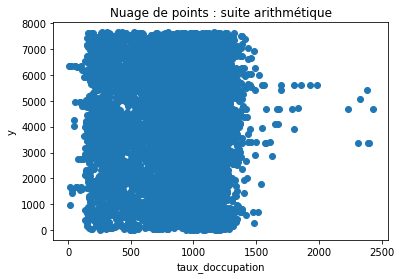

In [78]:
x = trafic['debit_horaire']
y = trafic.reset_index()['index']



plt.scatter(x,y)
plt.title('Nuage de points : suite arithmétique')
plt.xlabel('''taux_doccupation''')
plt.ylabel('y')
plt.show()

from sklearn.linear_model import LinearRegression
#données
x = trafic.reset_index()['index']
y = trafic['Débit horaire']
#instancier modèle
model_linRegMul = LinearRegression()
#entrainement du modèle
model_linRegMul.fit(x, y)
#précision du modèle
precision = model_linRegMul.score(x, y)
print(precision*100)
#prédiction
test = np.arange(10).reshape((-1, 2))
prediction = model_linRegMul.predict(test)
print(prediction)

In [79]:
trafic_daily = trafic.groupby(['date'], as_index = False).agg({
    'debit_horaire' : 'mean'
})

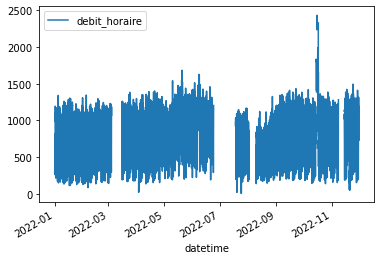

In [80]:
trafic.plot(x = 'datetime', y = 'debit_horaire', kind = 'line')

plt.show()

In [81]:
import plotly.express as px

fig = px.line(trafic , x="datetime", y="debit_horaire", title='Debit horaire')
fig.show()

In [82]:
fig = px.line(trafic , x="datetime", y='''taux_doccupation''', title='Debit horaire')
fig.show()

In [83]:
trafic_daily.reset_index()

index       date  debit_horaire
0        0 2022-01-01     751.500000
1        1 2022-01-02     865.750000
2        2 2022-01-03     824.875000
3        3 2022-01-04     813.791667
4        4 2022-01-05     833.666667
..     ...        ...            ...
320    320 2022-11-27     825.125000
321    321 2022-11-28     869.500000
322    322 2022-11-29     922.666667
323    323 2022-11-30     905.416667
324    324 2022-12-01     730.000000

[325 rows x 3 columns]

In [84]:
from datetime import date
import calendar
my_date = date.today()
calendar.day_name[my_date.weekday()]

'Saturday'

In [85]:
trafic_by_day = trafic.groupby(['day_of_week'], as_index = False).agg({
    'debit_horaire' : 'median'
})

In [86]:
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

{'Sunday': 0,
 'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6}

In [87]:
trafic_by_day['day_id'] = trafic_by_day['day_of_week']
trafic_by_day['day_id'] = trafic_by_day['day_id'].map(sorterIndex)
trafic_by_day = trafic_by_day.sort_values('day_id')

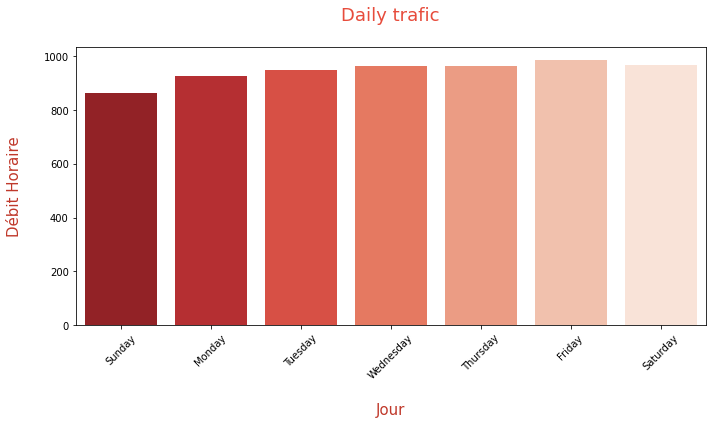

In [88]:
plt.figure(figsize=(10,6))
sns.barplot(x=trafic_by_day['day_of_week'], y=trafic_by_day['debit_horaire'], palette="Reds_r")
plt.xlabel('\nJour', fontsize=15, color='#c0392b')
plt.ylabel("Débit Horaire\n", fontsize=15, color='#c0392b')
plt.title("Daily trafic\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation= 45)
plt.tight_layout()

In [89]:
trafic_by_hour = trafic.groupby(['time'], as_index = False).agg({
    'debit_horaire' : 'mean'
})

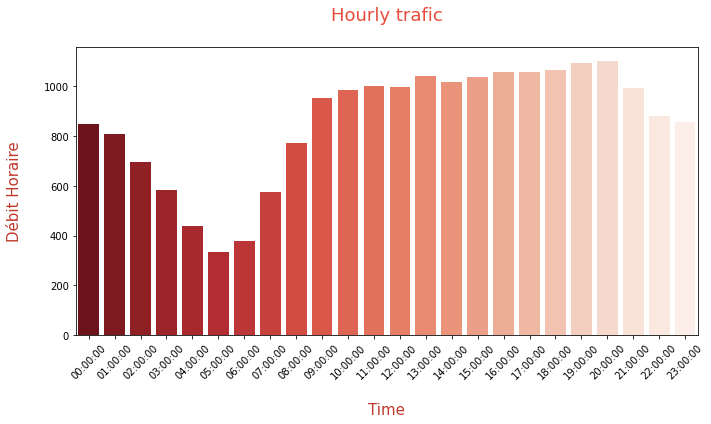

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(x=trafic_by_hour['time'], y=trafic_by_hour['debit_horaire'], palette="Reds_r")
plt.xlabel('\nTime', fontsize=15, color='#c0392b')
plt.ylabel("Débit Horaire\n", fontsize=15, color='#c0392b')
plt.title("Hourly trafic\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation= 45)
plt.tight_layout()

<Figure size 1800x1080 with 0 Axes>

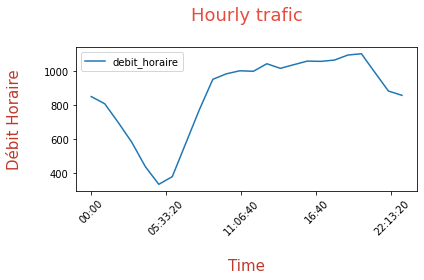

In [91]:
plt.figure(figsize=(25,15))
trafic_by_hour.plot(x='time', y = 'debit_horaire', kind = 'line')
plt.xlabel('\nTime', fontsize=15, color='#c0392b')
plt.ylabel("Débit Horaire\n", fontsize=15, color='#c0392b')
plt.title("Hourly trafic\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

In [92]:
trafic['day_week_plus_time'] = trafic['day_of_week'].astype(str) + trafic['time'].astype(str)

In [93]:
trafic = trafic.sort_values('datetime')

In [94]:
trafic['day_id'] = trafic['day_of_week']
trafic['day_id'] = trafic['day_id'].map(sorterIndex)
trafic = trafic.sort_values('day_id')

In [95]:
trafic_by_day_week_and_time = trafic.groupby(['day_id','day_of_week','time','day_week_plus_time'], as_index = False).agg({
    'debit_horaire' : 'mean',
    "taux_doccupation" : 'mean'
})
trafic_by_day_week_and_time.head()

day_id day_of_week      time day_week_plus_time  debit_horaire  \
0       0      Sunday  00:00:00     Sunday00:00:00    1127.125000   
1       0      Sunday  01:00:00     Sunday01:00:00    1121.589744   
2       0      Sunday  02:00:00     Sunday02:00:00    1072.216216   
3       0      Sunday  03:00:00     Sunday03:00:00    1003.108108   
4       0      Sunday  04:00:00     Sunday04:00:00     907.078947   

   taux_doccupation  
0         30.524641  
1         27.394760  
2         25.633004  
3         23.913965  
4         17.807166

<Figure size 1800x1080 with 0 Axes>

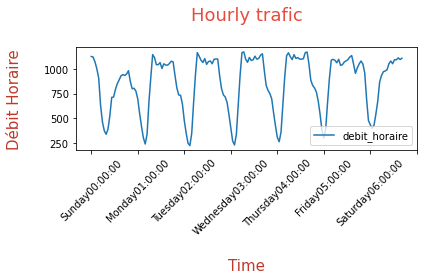

In [96]:
plt.figure(figsize=(25,15))
trafic_by_day_week_and_time.plot(x='day_week_plus_time', y = 'debit_horaire', kind = 'line')
plt.xlabel('\nTime', fontsize=15, color='#c0392b')
plt.ylabel("Débit Horaire\n", fontsize=15, color='#c0392b')
plt.title("Hourly trafic\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

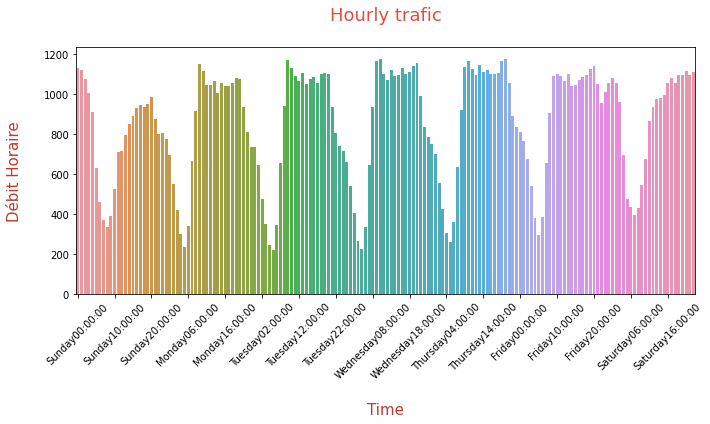

In [97]:
plt.figure(figsize=(10,6))
sns.barplot(x=trafic_by_day_week_and_time['day_week_plus_time'], y=trafic_by_day_week_and_time['debit_horaire'])
plt.xlabel('\nTime', fontsize=15, color='#c0392b')
plt.ylabel("Débit Horaire\n", fontsize=15, color='#c0392b')
plt.title("Hourly trafic\n", fontsize=18, color='#e74c3c')
plt.xticks(ticks = [i*10 for i in range(1+int(len(trafic_by_day_week_and_time['day_week_plus_time'])/10))],rotation= 45)
plt.tight_layout()

In [98]:
trafic = trafic.sort_values('datetime')
trafic

identifiant_arc            libelle  date_et_heure_de_comptage  \
7591             4264  AV_Champs_Elysees  2022-01-01T00:00:00+01:00   
7362             4264  AV_Champs_Elysees  2022-01-01T01:00:00+01:00   
7363             4264  AV_Champs_Elysees  2022-01-01T02:00:00+01:00   
7519             4264  AV_Champs_Elysees  2022-01-01T03:00:00+01:00   
6                4264  AV_Champs_Elysees  2022-01-01T04:00:00+01:00   
...               ...                ...                        ...   
7545             4264  AV_Champs_Elysees  2022-11-30T20:00:00+01:00   
7514             4264  AV_Champs_Elysees  2022-11-30T21:00:00+01:00   
7544             4264  AV_Champs_Elysees  2022-11-30T22:00:00+01:00   
7543             4264  AV_Champs_Elysees  2022-11-30T23:00:00+01:00   
7542             4264  AV_Champs_Elysees  2022-12-01T00:00:00+01:00   

      debit_horaire  taux_doccupation etat_trafic  identifiant_noeud_amont  \
7591          289.0               NaN     Inconnu                     2294   
7362          304.0               NaN     Inconnu                     2294   
7363          394.0          61.90611      Bloqué                     2294   
7519          811.0          46.32278      Saturé                     2294   
6             500.0          67.08111      Bloqué                     2294   
...             ...               ...         ...                      ...   
7545         1130.0          23.41889  Pré-saturé                     2294   
7514         1151.0          21.93389  Pré-saturé                     2294   
7544          879.0          17.30111  Pré-saturé                     2294   
7543          754.0          16.12000  Pré-saturé                     2294   
7542          730.0          12.70111      Fluide                     2294   

               libelle_noeud_amont  identifiant_noeud_aval  \
7591  Av_Champs_Elysees-Washington                    2293   
7362  Av_Champs_Elysees-Washington                    2293   
7363  Av_Champs_Elysees-Washington                    2293   
7519  Av_Champs_Elysees-Washington                    2293   
6     Av_Champs_Elysees-Washington                    2293   
...                            ...                     ...   
7545  Av_Champs_Elysees-Washington                    2293   
7514  Av_Champs_Elysees-Washington                    2293   
7544  Av_Champs_Elysees-Washington                    2293   
7543  Av_Champs_Elysees-Washington                    2293   
7542  Av_Champs_Elysees-Washington                    2293   

           libelle_noeud_aval  ... date_debut_dispo_data date_fin_dispo_data  \
7591  Av_Champs_Elysees-Berri  ...            2005-01-01          2019-06-01   
7362  Av_Champs_Elysees-Berri  ...            2005-01-01          2019-06-01   
7363  Av_Champs_Elysees-Berri  ...            2005-01-01          2019-06-01   
7519  Av_Champs_Elysees-Berri  ...            2005-01-01          2019-06-01   
6     Av_Champs_Elysees-Berri  ...            2005-01-01          2019-06-01   
...                       ...  ...                   ...                 ...   
7545  Av_Champs_Elysees-Berri  ...            2005-01-01          2019-06-01   
7514  Av_Champs_Elysees-Berri  ...            2005-01-01          2019-06-01   
7544  Av_Champs_Elysees-Berri  ...            2005-01-01          2019-06-01   
7543  Av_Champs_Elysees-Berri  ...            2005-01-01          2019-06-01   
7542  Av_Champs_Elysees-Berri  ...            2005-01-01          2019-06-01   

                               geo_point_2d  \
7591   48.871535879911605,2.301722792456062   
7362   48.871535879911605,2.301722792456062   
7363   48.871535879911605,2.301722792456062   
7519   48.871535879911605,2.301722792456062   
6      48.871535879911605,2.301722792456062   
...                                     ...   
7545  48.871535879911605,2.3017227924560624   
7514  48.871535879911605,2.3017227924560624   
7544  48.871535879911605,2.3017227924560624   
7543  48.871535879911605,2.3017227924560

In [99]:
trafic['week_id'] = trafic['date'].dt.isocalendar().week

In [100]:
trafic_by_week_id = trafic.groupby(['week_id'],as_index = False).agg({
    'debit_horaire' : 'mean'
})

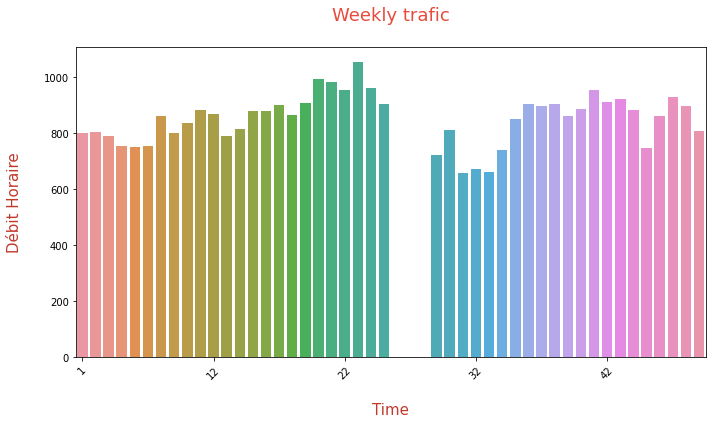

In [101]:
plt.figure(figsize=(10,6))
sns.barplot(x=trafic_by_week_id['week_id'], y=trafic_by_week_id['debit_horaire'])
plt.xlabel('\nTime', fontsize=15, color='#c0392b')
plt.ylabel("Débit Horaire\n", fontsize=15, color='#c0392b')
plt.title("Weekly trafic\n", fontsize=18, color='#e74c3c')
plt.xticks(ticks = [i*10 for i in range(1+int(len(trafic_by_week_id['week_id'])/10))],rotation= 45)
plt.tight_layout()

### Fin explo

# Fill na value

In [102]:
import plotly.express as px

fig = px.line(trafic , x="datetime", y="debit_horaire", title='Debit horaire')
fig.show()

In [103]:
fig = px.line(trafic , x="datetime", y='''taux_doccupation''', title='taux occupation')
fig.show()

#### Weighted Moving Average

https://towardsdatascience.com/4-techniques-to-handle-missing-values-in-time-series-data-c3568589b5a8

In [104]:

trafic['debit_horaire_spline'] = trafic['debit_horaire'].interpolate(method='polynomial',order = 1)

In [105]:
import plotly.express as px

fig = px.line(trafic , x="datetime", y="debit_horaire_spline", title='Debit horaire')
fig.show()

Forecasting

In [136]:
gap = trafic[trafic.debit_horaire.isna()]['index'].to_list()

In [140]:
gap

[130,
 1500,
 1501,
 1502,
 1503,
 1504,
 1505,
 1506,
 1507,
 1508,
 1509,
 1510,
 1511,
 1512,
 1513,
 1514,
 1515,
 1789,
 2070,
 2180,
 2181,
 2182,
 2184,
 2349,
 2350,
 2351,
 2352,
 2353,
 2375,
 2397,
 2399,
 2400,
 2401,
 2402,
 2493,
 2494,
 2495,
 2496,
 2536,
 2578,
 2696,
 3130,
 3131,
 3132,
 3521,
 3827,
 3828,
 3829,
 3830,
 3831,
 3832,
 3833,
 3834,
 3835,
 3836,
 3837,
 3838,
 3839,
 3840,
 3841,
 3842,
 3843,
 3844,
 3845,
 3846,
 3847,
 3848,
 3849,
 3850,
 3851,
 3852,
 3853,
 3854,
 3855,
 3856,
 3857,
 3858,
 3859,
 3860,
 3861,
 3862,
 3863,
 3864,
 3865,
 3866,
 3867,
 3868,
 3869,
 3870,
 3871,
 3872,
 3873,
 3874,
 3875,
 3876,
 3877,
 3878,
 3879,
 3880,
 3881,
 3882,
 3883,
 3884,
 3885,
 3886,
 3887,
 3888,
 3889,
 3890,
 3891,
 3892,
 3893,
 3894,
 3895,
 3896,
 3897,
 3898,
 3899,
 3900,
 3901,
 3902,
 3903,
 3904,
 3905,
 3906,
 3907,
 3908,
 3909,
 3910,
 3911,
 3912,
 3913,
 3914,
 3915,
 3916,
 3917,
 3918,
 3919,
 3920,
 3921,
 3922,
 3923,
 3924,


In [142]:
dict_gap= {}
to_add_in_dict_gap = [gap[0]]

for gap_index in range(len(gap[1:])):
    
    if gap[gap_index] + 1 == gap[gap_index + 1]:
        to_add_in_dict_gap.append(gap[gap_index + 1])
    
    else:
        dict_gap[len(dict_gap)] = to_add_in_dict_gap
        to_add_in_dict_gap = [gap[gap_index + 1]]
        
dict_gap[len(dict_gap)] = to_add_in_dict_gap

In [143]:
dict_gap

{0: [130],
 1: [1500,
  1501,
  1502,
  1503,
  1504,
  1505,
  1506,
  1507,
  1508,
  1509,
  1510,
  1511,
  1512,
  1513,
  1514,
  1515],
 2: [1789],
 3: [2070],
 4: [2180, 2181, 2182],
 5: [2184],
 6: [2349, 2350, 2351, 2352, 2353],
 7: [2375],
 8: [2397],
 9: [2399, 2400, 2401, 2402],
 10: [2493, 2494, 2495, 2496],
 11: [2536],
 12: [2578],
 13: [2696],
 14: [3130, 3131, 3132],
 15: [3521],
 16: [3827,
  3828,
  3829,
  3830,
  3831,
  3832,
  3833,
  3834,
  3835,
  3836,
  3837,
  3838,
  3839,
  3840,
  3841,
  3842,
  3843,
  3844,
  3845,
  3846,
  3847,
  3848,
  3849,
  3850,
  3851,
  3852,
  3853,
  3854,
  3855,
  3856,
  3857,
  3858,
  3859,
  3860,
  3861,
  3862,
  3863,
  3864,
  3865,
  3866,
  3867,
  3868,
  3869,
  3870,
  3871,
  3872,
  3873,
  3874,
  3875,
  3876,
  3877,
  3878,
  3879,
  3880,
  3881,
  3882,
  3883,
  3884,
  3885,
  3886,
  3887,
  3888,
  3889,
  3890,
  3891,
  3892,
  3893,
  3894,
  3895,
  3896,
  3897,
  3898,
  3899,
  3900,
  3

In [ ]:
#fill gap with SARIMA

In [165]:
trafic['forecast_debit_horaire'] = trafic['debit_horaire']

In [183]:
for gap in dict_gap:
    if dict_gap[gap][0] <= 200:
        train_begin = 0
    else:
        train_begin = dict_gap[gap][0] - 200
    
    train_end = dict_gap[gap][0] - 1
    
    model=sm.tsa.statespace.SARIMAX(trafic['debit_horaire'][train_begin:train_end],order=(0, 0, 0),seasonal_order=(0,1,0,24))
    results=model.fit()
    trafic['forecast_debit_horaire'][dict_gap[gap]]=results.predict(start=dict_gap[gap][0],end=dict_gap[gap][-1],dynamic=True)

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning:

Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.

<ipython-input-183-9be477b2fc79>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

N

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning:

Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.

<ipython-input-183-9be477b2fc79>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: Value

<ipython-input-183-9be477b2fc79>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning:

Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.

<ipython-input-183-9be477b2fc79>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning:

Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.

<ipython-input-183-9be477b2fc79>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\liams\AppDa

<ipython-input-183-9be477b2fc79>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\liams\AppData

<AxesSubplot:xlabel='datetime'>

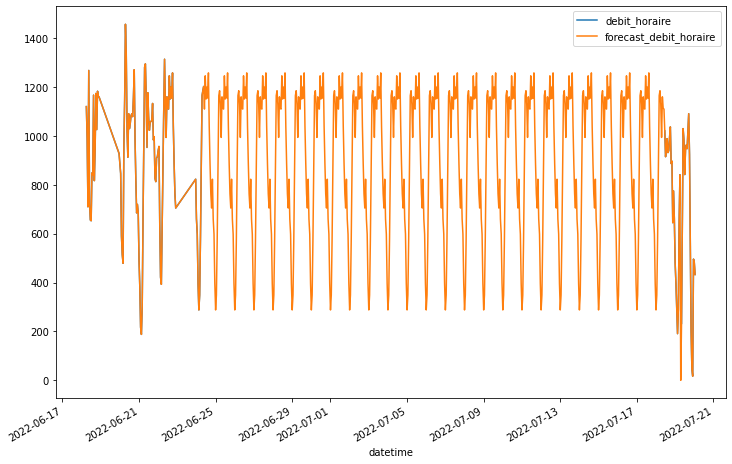

In [184]:
trafic[['debit_horaire','forecast_debit_horaire']][dict_gap[16][0] - 100:dict_gap[16][-1] + 40].plot(figsize=(12,8))

<AxesSubplot:xlabel='datetime'>

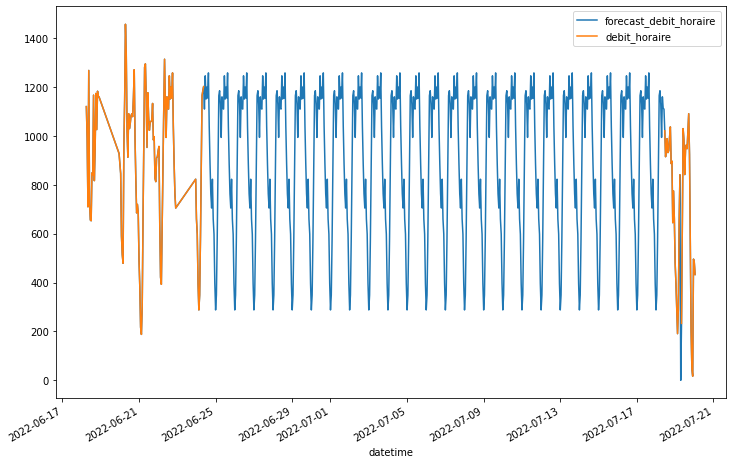

In [185]:
trafic[['forecast_debit_horaire', 'debit_horaire']][dict_gap[16][0] - 100:dict_gap[16][-1] + 40].plot(figsize=(12,8))

<AxesSubplot:xlabel='datetime'>

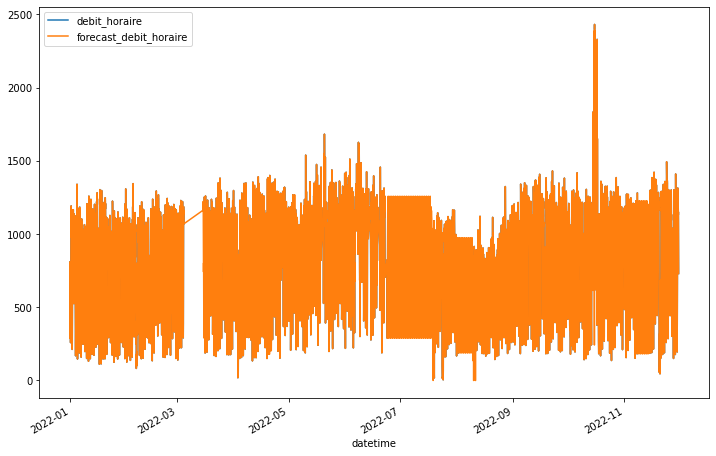

In [187]:
trafic[['debit_horaire','forecast_debit_horaire']].plot(figsize=(12,8))

<AxesSubplot:xlabel='datetime'>

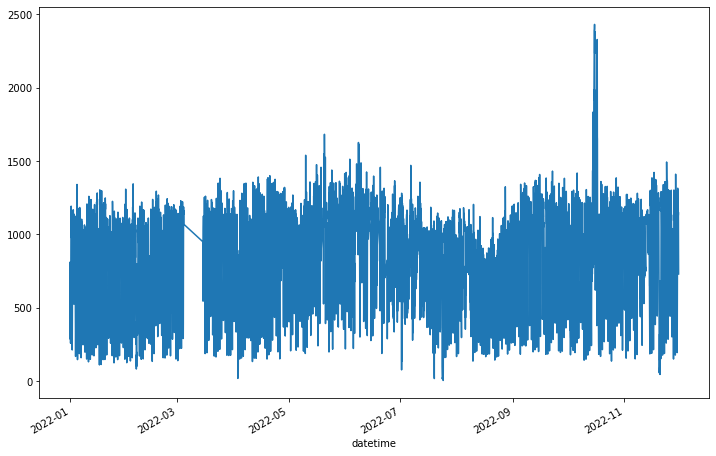

In [188]:
trafic['debit_horaire_spline'].plot(figsize=(12,8))

In [106]:
trafic.columns

Index(['identifiant_arc', 'libelle', 'date_et_heure_de_comptage',
       'debit_horaire', 'taux_doccupation', 'etat_trafic',
       'identifiant_noeud_amont', 'libelle_noeud_amont',
       'identifiant_noeud_aval', 'libelle_noeud_aval', 'etat_arc',
       'date_debut_dispo_data', 'date_fin_dispo_data', 'geo_point_2d',
       'geo_shape', 'datetime', 'date', 'time', 'day_of_week',
       'day_week_plus_time', 'day_id', 'week_id', 'debit_horaire_spline'],
      dtype='object')

In [107]:
trafic = trafic.reset_index().drop('index', axis = 1).reset_index()

In [108]:
trafic.index = pd.to_datetime(trafic['datetime'], utc=True)

# Debut forecast

In [109]:
data = trafic[['debit_horaire_spline']]
data = data[-24*30:]

<AxesSubplot:xlabel='datetime'>

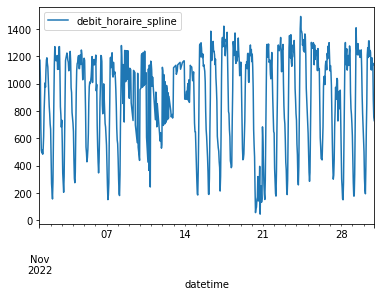

In [110]:
data.plot()

In [111]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

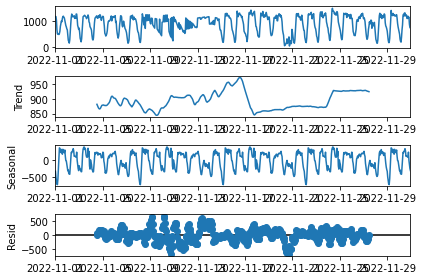

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(data, model="add", period = 7*24)
decompose_data.plot();

<AxesSubplot:xlabel='datetime'>

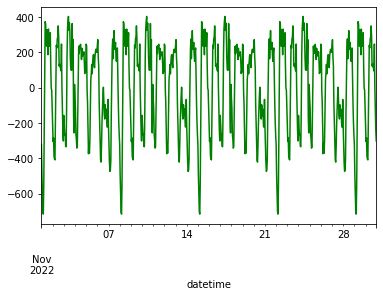

In [113]:
seasonality=decompose_data.seasonal
seasonality.plot(color='green')

In [114]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.debit_horaire_spline, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)


1. ADF :  -4.333843589562304
2. P-Value :  0.00038793966078728195
3. Num Of Lags :  20
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 699
5. Critical Values :
	 1% :  -3.439739809554328
	 5% :  -2.86568368980381
	 10% :  -2.5689766074363334


In [115]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(data['debit_horaire_spline'],order=(1,1,1))
history=model.fit()

history.summary()

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     debit_horaire_spline   No. Observations:                  720
Model:                   ARIMA(1, 1, 1)   Log Likelihood               -4678.988
Date:                  Sat, 03 Dec 2022   AIC                           9363.977
Time:                          21:49:45   BIC                           9377.710
Sample:                      11-01-2022   HQIC                          9369.279
                           - 11-30-2022                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4970      0.160      3.108      0.002       0.184       0.810
ma.L1         -0.3505      0.158     -2.221      0.026      -0.660      -0.041
sigma2       2.63e+04    875.745     30.033      0.000    2.46e+04     2.8e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):              1002.71
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
model_fit = model.fit()

<AxesSubplot:xlabel='datetime'>

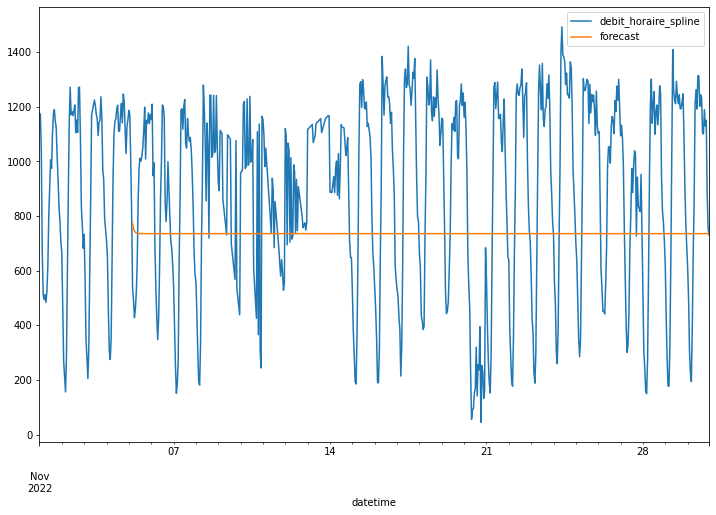

In [117]:
data['forecast']=model_fit.predict(start=100,end=720,dynamic=True)
data[['debit_horaire_spline','forecast']].plot(figsize=(12,8))

In [118]:
rolling_mean = data['debit_horaire_spline'].rolling(window = 24).mean()
data['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()

In [119]:
model=ARIMA(data['rolling_mean_diff'].dropna(),order=(1,1,1))
model_fit=model.fit()

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.



<AxesSubplot:xlabel='datetime'>

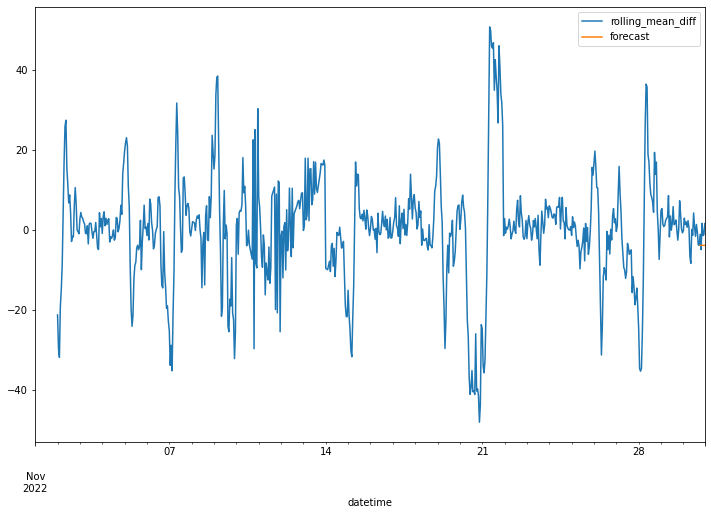

In [120]:
data['forecast']=model_fit.predict(start=690,end=720,dynamic=True)
data[['rolling_mean_diff','forecast']].plot(figsize=(12,8))

In [121]:
import statsmodels.api as sm

In [122]:
model=sm.tsa.statespace.SARIMAX(data['debit_horaire_spline'],order=(0, 0, 0),seasonal_order=(0,1,0,24))
results=model.fit()

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.



<AxesSubplot:xlabel='datetime'>

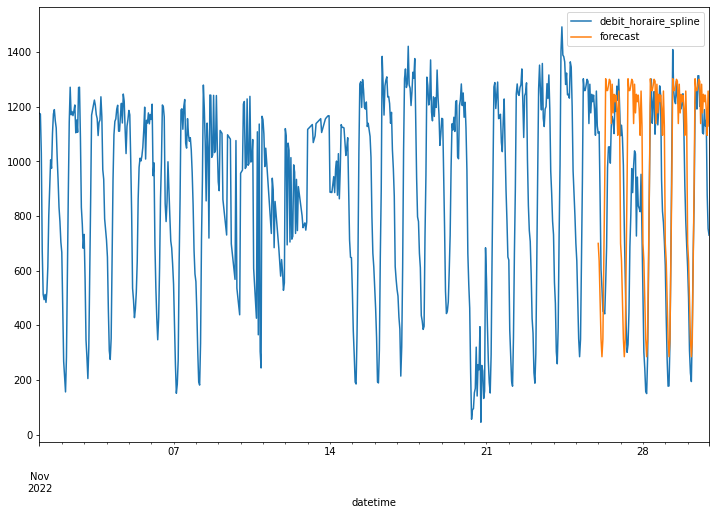

In [123]:
data['forecast']=results.predict(start=600,end=720,dynamic=True)
data[['debit_horaire_spline','forecast']].plot(figsize=(12,8))

In [124]:
data.debit_horaire_spline.values

array([1176.        , 1174.        , 1031.        ,  672.        ,
        513.        ,  494.        ,  513.        ,  484.        ,
        524.        ,  614.        ,  801.        ,  908.        ,
       1006.        ,  975.        , 1103.        , 1174.        ,
       1190.        , 1149.        , 1123.        , 1018.        ,
        933.        ,  833.        ,  780.        ,  705.        ,
        667.        ,  465.        ,  268.        ,  212.        ,
        156.        ,  283.        ,  602.        ,  887.        ,
       1145.        , 1272.        , 1171.        , 1183.        ,
       1168.        , 1185.        , 1207.        , 1105.        ,
       1152.        , 1107.        , 1271.        , 1272.        ,
       1087.        ,  832.        ,  771.        ,  682.        ,
        733.        ,  570.        ,  346.        ,  282.        ,
        205.        ,  319.        ,  583.        ,  864.        ,
       1170.        , 1188.33333333, 1206.66666667, 1225.     

<AxesSubplot:xlabel='datetime'>

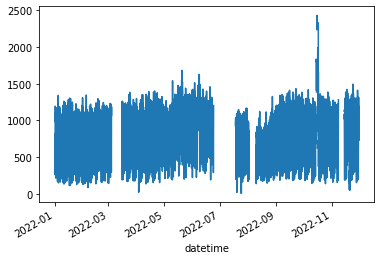

In [128]:
trafic['debit_horaire'].plot()

In [130]:
trafic[trafic.debit_horaire.isna()]['debit_horaire'] = trafic_daily.debit_horaire.to_list()

datetime
2022-01-06 09:00:00+00:00   NaN
2022-03-15 00:00:00+00:00   NaN
2022-03-15 01:00:00+00:00   NaN
2022-03-15 02:00:00+00:00   NaN
2022-03-15 03:00:00+00:00   NaN
                             ..
2022-11-14 08:00:00+00:00   NaN
2022-11-14 09:00:00+00:00   NaN
2022-11-14 10:00:00+00:00   NaN
2022-11-14 11:00:00+00:00   NaN
2022-11-14 16:00:00+00:00   NaN
Name: debit_horaire, Length: 992, dtype: float64

In [125]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
data = trafic_daily.debit_horaire.to_list()
# fit model
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

C:\Users\liams\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



[824.08050482]


In [126]:
trafic

index  identifiant_arc            libelle  \
datetime                                                               
2021-12-31 23:00:00+00:00      0             4264  AV_Champs_Elysees   
2022-01-01 00:00:00+00:00      1             4264  AV_Champs_Elysees   
2022-01-01 01:00:00+00:00      2             4264  AV_Champs_Elysees   
2022-01-01 02:00:00+00:00      3             4264  AV_Champs_Elysees   
2022-01-01 03:00:00+00:00      4             4264  AV_Champs_Elysees   
...                          ...              ...                ...   
2022-11-30 19:00:00+00:00   7650             4264  AV_Champs_Elysees   
2022-11-30 20:00:00+00:00   7651             4264  AV_Champs_Elysees   
2022-11-30 21:00:00+00:00   7652             4264  AV_Champs_Elysees   
2022-11-30 22:00:00+00:00   7653             4264  AV_Champs_Elysees   
2022-11-30 23:00:00+00:00   7654             4264  AV_Champs_Elysees   

                           date_et_heure_de_comptage  debit_horaire  \
datetime                                                              
2021-12-31 23:00:00+00:00  2022-01-01T00:00:00+01:00          289.0   
2022-01-01 00:00:00+00:00  2022-01-01T01:00:00+01:00          304.0   
2022-01-01 01:00:00+00:00  2022-01-01T02:00:00+01:00          394.0   
2022-01-01 02:00:00+00:00  2022-01-01T03:00:00+01:00          811.0   
2022-01-01 03:00:00+00:00  2022-01-01T04:00:00+01:00          500.0   
...                                              ...            ...   
2022-11-30 19:00:00+00:00  2022-11-30T20:00:00+01:00         1130.0   
2022-11-30 20:00:00+00:00  2022-11-30T21:00:00+01:00         1151.0   
2022-11-30 21:00:00+00:00  2022-11-30T22:00:00+01:00          879.0   
2022-11-30 22:00:00+00:00  2022-11-30T23:00:00+01:00          754.0   
2022-11-30 23:00:00+00:00  2022-12-01T00:00:00+01:00          730.0   

                           taux_doccupation etat_trafic  \
datetime                                                  
2021-12-31 23:00:00+00:00               NaN     Inconnu   
2022-01-01 00:00:00+00:00               NaN     Inconnu   
2022-01-01 01:00:00+00:00          61.90611      Bloqué   
2022-01-01 02:00:00+00:00          46.32278      Saturé   
2022-01-01 03:00:00+00:00          67.08111      Bloqué   
...                                     ...         ...   
2022-11-30 19:00:00+00:00          23.41889  Pré-saturé   
2022-11-30 20:00:00+00:00          21.93389  Pré-saturé   
2022-11-30 21:00:00+00:00          17.30111  Pré-saturé   
2022-11-30 22:00:00+00:00          16.12000  Pré-saturé   
2022-11-30 23:00:00+00:00          12.70111      Fluide   

                           identifiant_noeud_amont  \
datetime                                             
2021-12-31 23:00:00+00:00                     2294   
2022-01-01 00:00:00+00:00                     2294   
2022-01-01 01:00:00+00:00                     2294   
2022-01-01 02:00:00+00:00                     2294   
2022-01-01 03:00:00+00:00                     2294   
...                                            ...   
2022-11-30 19:00:00+00:00                     2294   
2022-11-30 20:00:00+00:00                     2294   
2022-11-30 21:00:00+00:00                     2294   
2022-11-30 22:00:00+00:00                     2294   
2022-11-30 23:00:00+00:00                     2294   

                                    libelle_noeud_amont  \
datetime                                                  
2021-12-31 23:00:00+00:00  Av_Champs_Elysees-Washington   
2022-01-01 00:00:00+00:00  Av_Champs_Elysees-Washington   
2022-01-01 01:00:00+00:00  Av_Champs_Elysees-Washington   
2022-01-01 02:00:00+00:00  Av_Champs_Elysees-Washington   
2022-01-01 03:00:00+00:00  Av_Champs_Elysees-Washington   
...                                                 ...   
2022-11-30 19:00:00+00:00  Av_Champs_Elysees-Washington   
2022-11-30 20:00:00+00:00  Av_Champs_Elysees-Washington   
2022-11-30 21:00:00+00:00  Av_Champs_Elysees-Washington   
2022-11-30 22:00:00+00:00  Av_Champs_Elysees-W